In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

# import from utils.ipynb
import ipynb.fs.full.utils as utils

# 1. Load raw input -- Share number uncertain before 2013
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=7
currency_pair = 'NOK=X'
numbers_in_currency = 'NOK'
share_name = 'GSF.OL'

# 1.2. Raw input statement data

In [3]:
route = f"../csv_files/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

## (OPTIONAL) Time Filtering - Last 7 years daat

In [4]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,sell_gen_adm_exp,r&d,other_income,financial_income,profit_before_tax,tax,...,other_investing_cf_items,cash_from_investing,financing_cf_item,total_cash_dividend_paied,issuance_of_stocks,issuance_of_debt,cash_from_financing,foreign_exchange_effect,net_change_in_cash,shares
0,2008-03-31,350,-209,141,-40,0,-153,-26,-79,-23,...,645,645,-546,0,0,0,-546,0,158,112
1,2008-06-30,344,-181,163,-39,0,-24,-29,70,-19,...,-153,-153,5,0,0,0,5,0,-102,112
2,2008-09-30,436,-238,198,-36,0,-157,0,5,-4,...,-82,-82,95,0,0,0,95,0,2,112
3,2008-12-31,358,-223,134,-50,0,-524,0,-439,-98,...,-33,-33,3,0,0,0,3,0,-15,112
4,2009-03-31,284,-115,169,-42,0,17,27,171,-47,...,-35,-35,21,0,0,0,21,-2,-4,112


## Calculate date when quaterly reports could be available

In [5]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [6]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,1600,13390,823,0,369,1773,3575,6783,507,-160
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,1478,12875,717,0,369,1849,3492,6390,-148,-160
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,1524,13222,494,0,363,1547,3429,6195,99,-276
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,1562,13632,633,0,420,2613,3661,7573,709,-185
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,1534,13076,759,0,443,2199,3606,6915,-380,-145


## Pull historical average USD national currency rates and add to the dataframe

In [7]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,13390,823,0,369,1773,3575,6783,507,-160,9.966961
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,12875,717,0,369,1849,3492,6390,-148,-160,10.186402
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,13222,494,0,363,1547,3429,6195,99,-276,10.221379
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,13632,633,0,420,2613,3661,7573,709,-185,10.699984
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,13076,759,0,443,2199,3606,6915,-380,-145,10.483742


## Convert USD values related to IS, BS, CFS to national currency

In [8]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
58,2022-09-30,2022-10-21,112,1709,-760,949,-279,2175,178,234,...,13390,823,0,369,1773,3575,6783,507,-160,9.966961
59,2022-12-31,2023-02-11,112,1640,-586,1054,62,643,259,240,...,12875,717,0,369,1849,3492,6390,-148,-160,10.186402
60,2023-03-31,2023-04-21,112,1546,-415,1131,427,243,210,216,...,13222,494,0,363,1547,3429,6195,99,-276,10.221379
61,2023-06-30,2023-07-21,112,2372,-954,1419,-4,802,321,211,...,13632,633,0,420,2613,3661,7573,709,-185,10.699984
62,2023-09-30,2023-10-21,112,1164,-383,781,-100,286,203,202,...,13076,759,0,443,2199,3606,6915,-380,-145,10.483742


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [9]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [10]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [11]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [12]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2008-04-21,9.591194,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
1,2008-04-28,9.358077,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
2,2008-05-05,9.324772,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
3,2008-05-12,9.324772,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077
4,2008-05-19,8.925140,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.398594,0.601406,9.722222,5.726027,7.650273,0.87723,0.402857,-0.16,-0.074967,-0.188077


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [13]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2008-04-21,9.591194,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.795597,0.901943,0.767296,1.920153,4.551753
1,2008-04-28,9.358077,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.679039,0.880021,0.748646,1.901503,4.441121
2,2008-05-05,9.324772,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.662386,0.876889,0.745982,1.898839,4.425315
3,2008-05-12,9.324772,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.662386,0.876889,0.745982,1.898839,4.425315
4,2008-05-19,8.925140,2008-03-31,350.0,-2.0,10.633929,112.0,236.0,2.107143,183.0,...,0.87723,0.402857,-0.16,-0.074967,-0.188077,-4.462570,0.839308,0.714011,1.866868,4.235660


# Calculate Dividend yield and currency-share price correlation

In [14]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

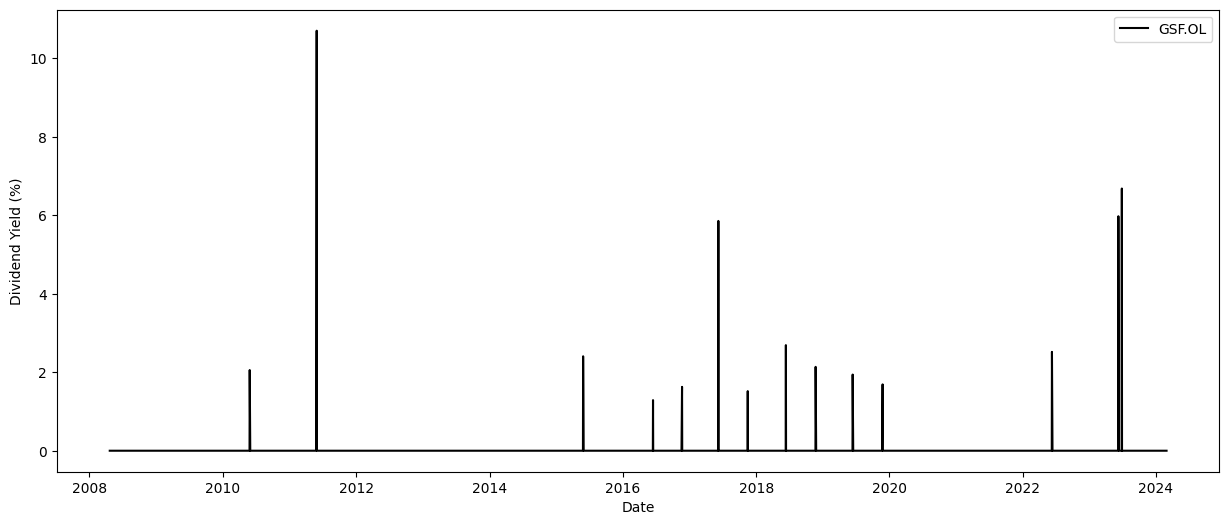

In [15]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.812298
share_price      1.000000
Name: share_price, dtype: float64


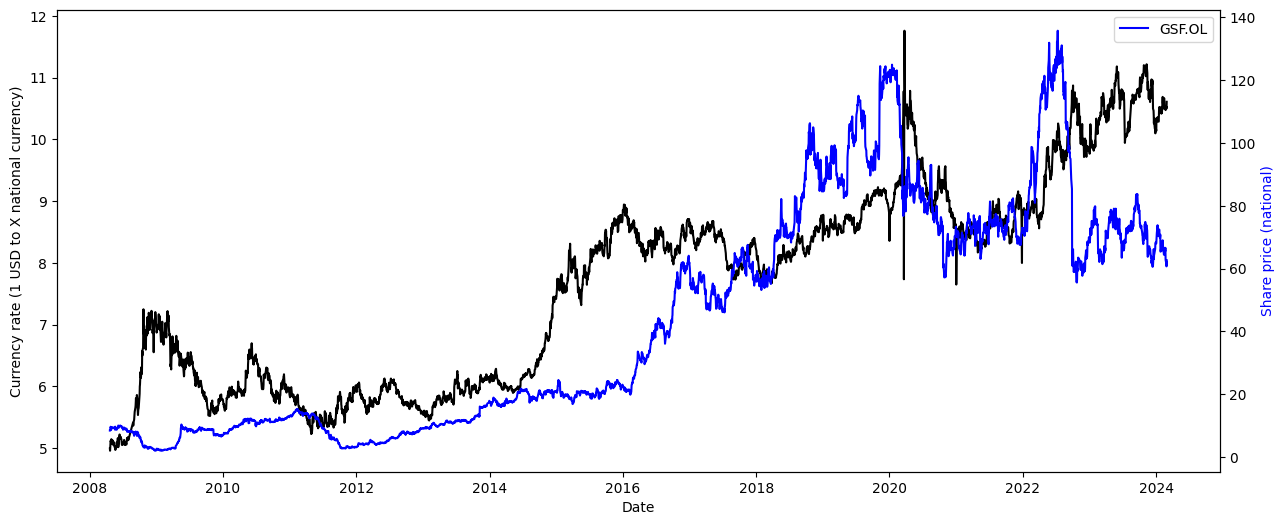

In [16]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

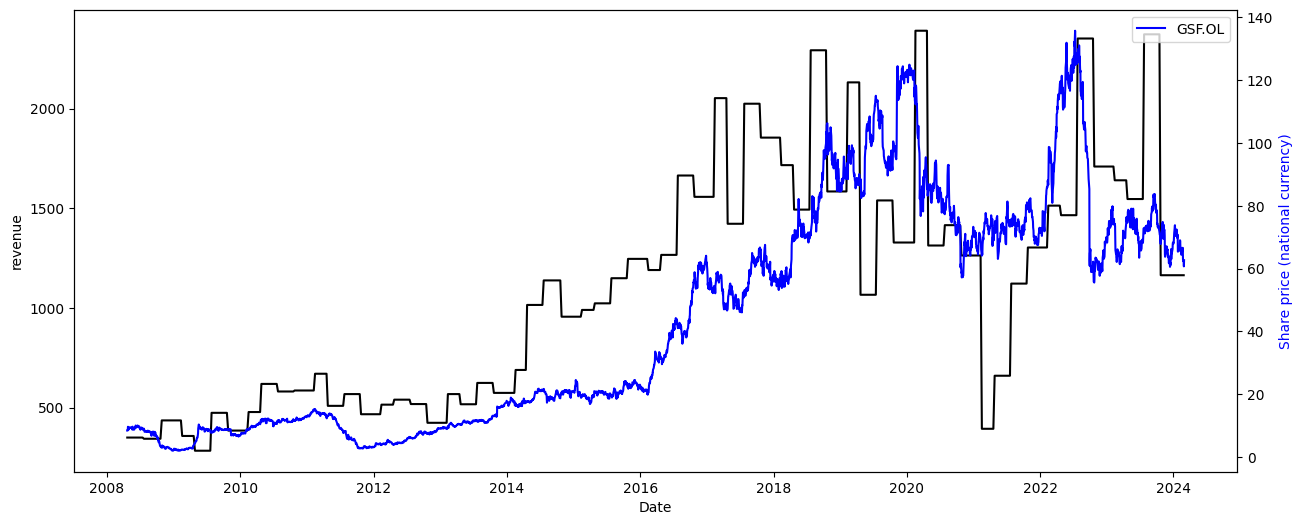

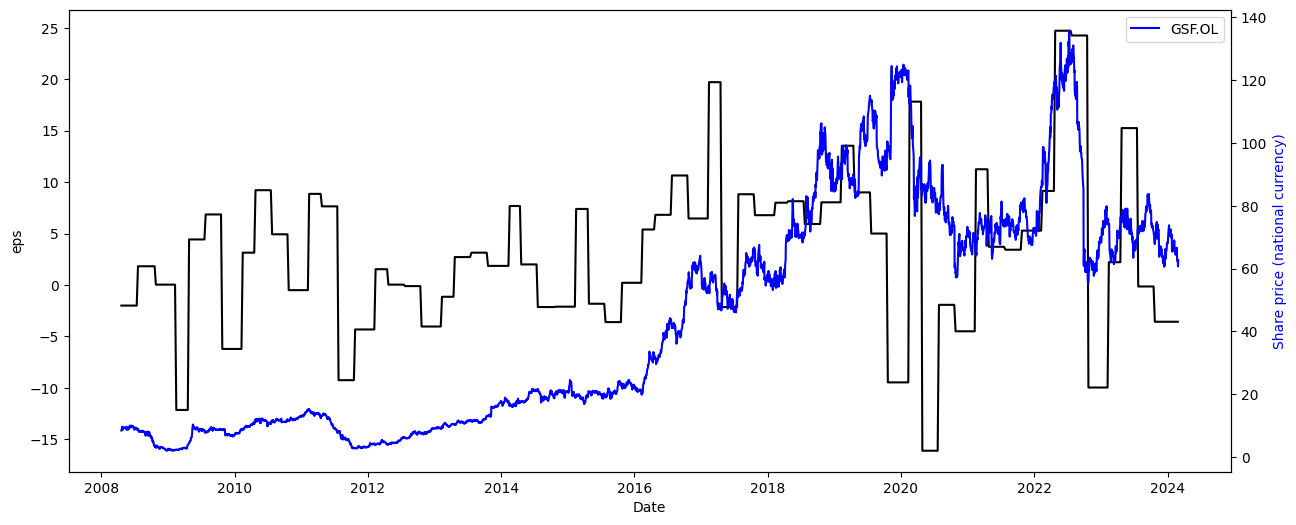

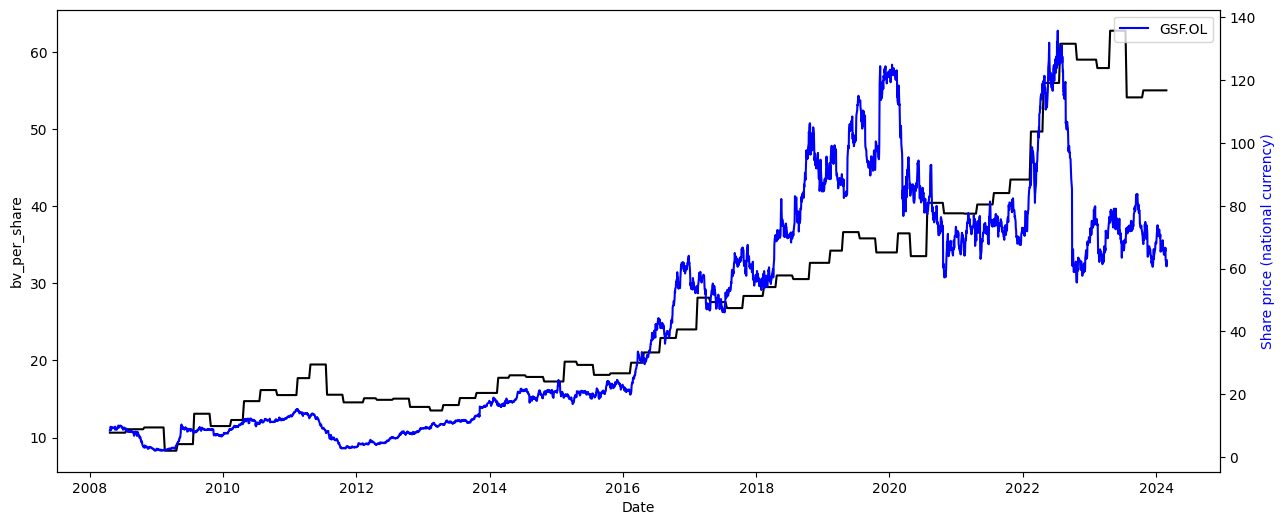

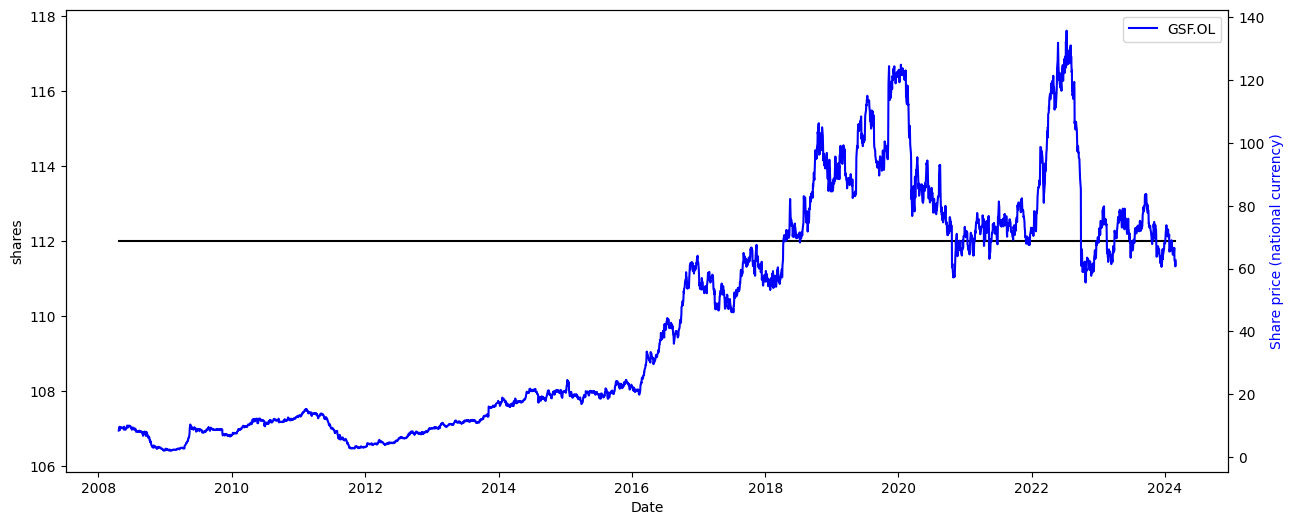

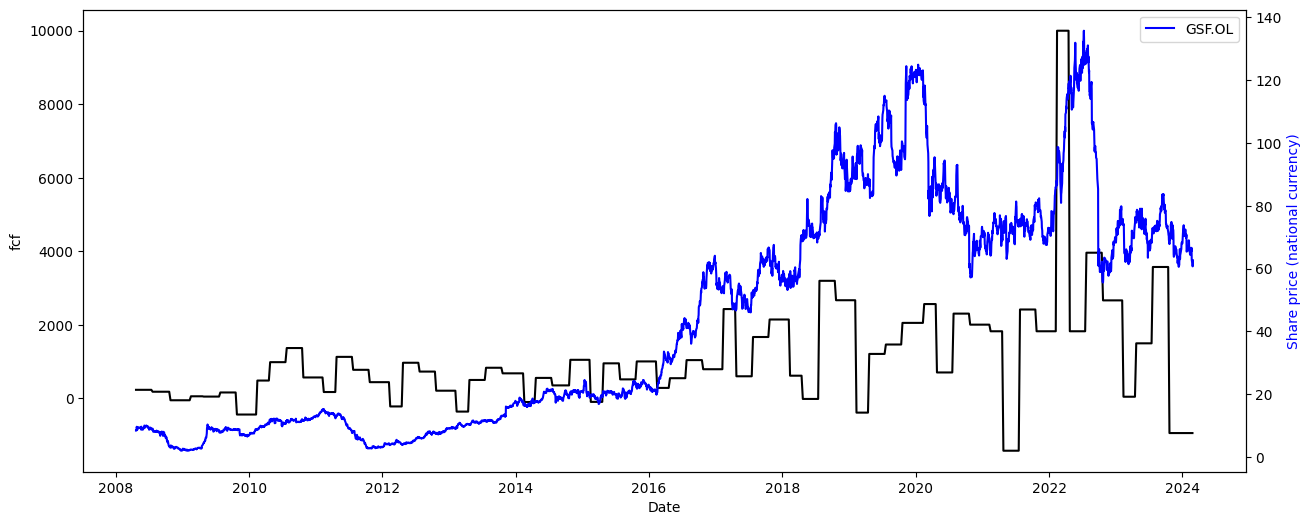

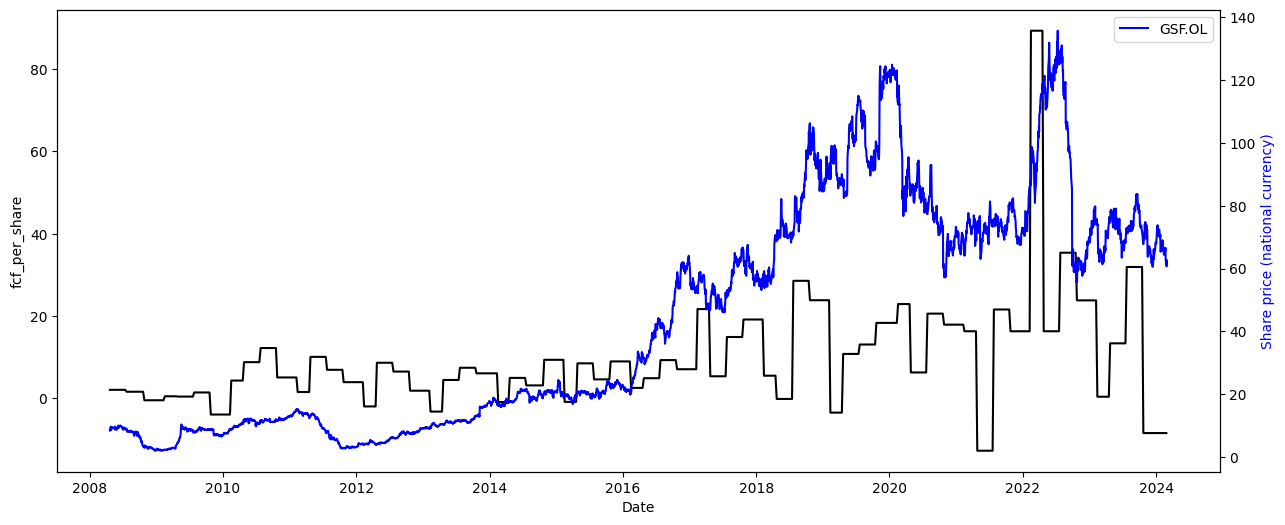

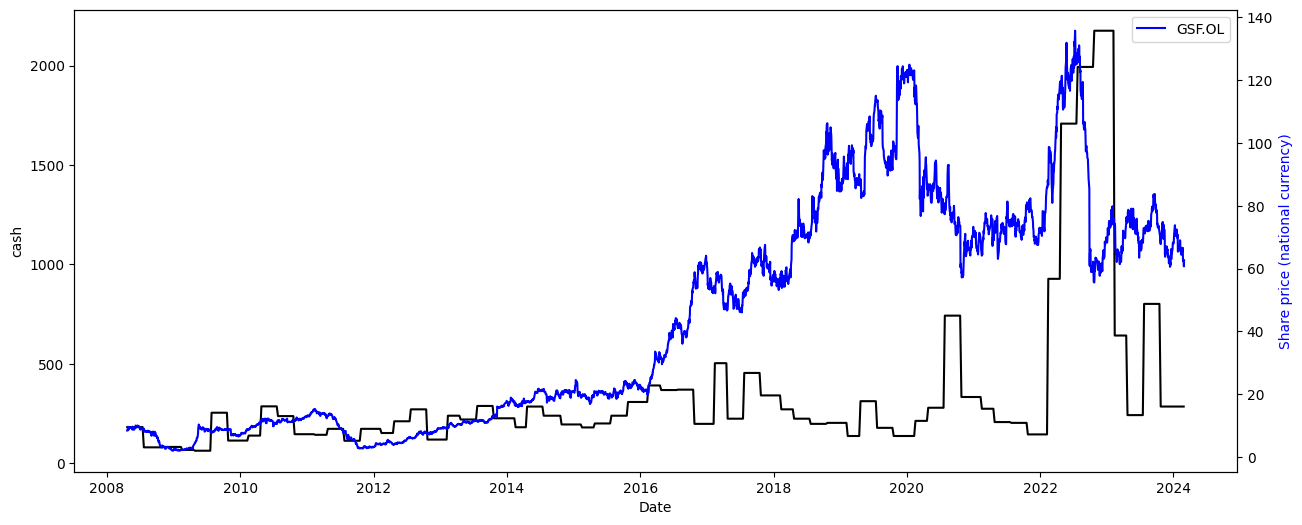

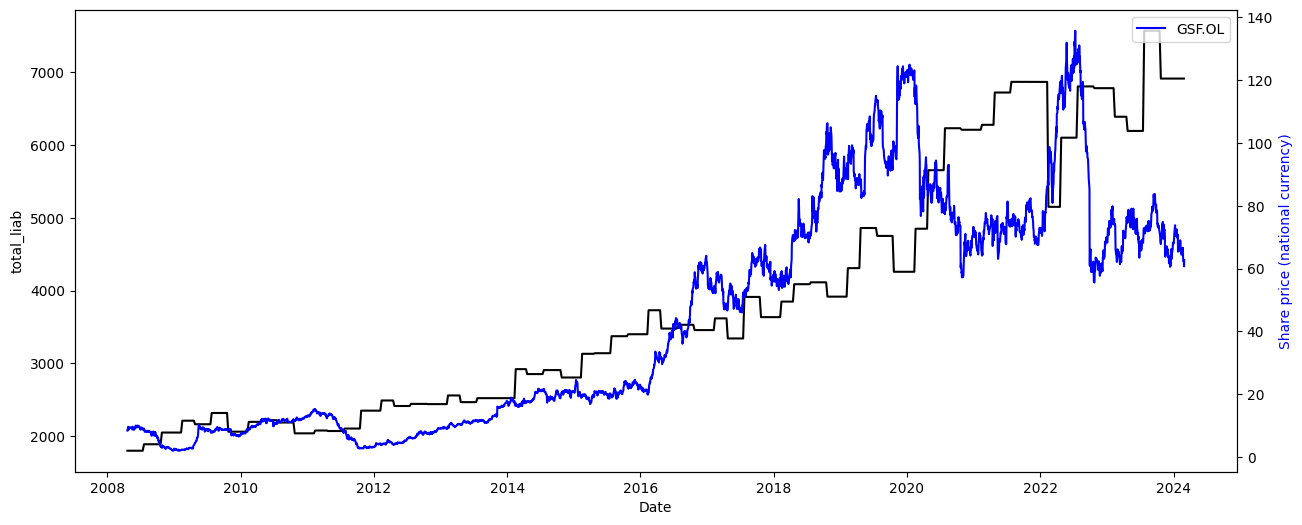

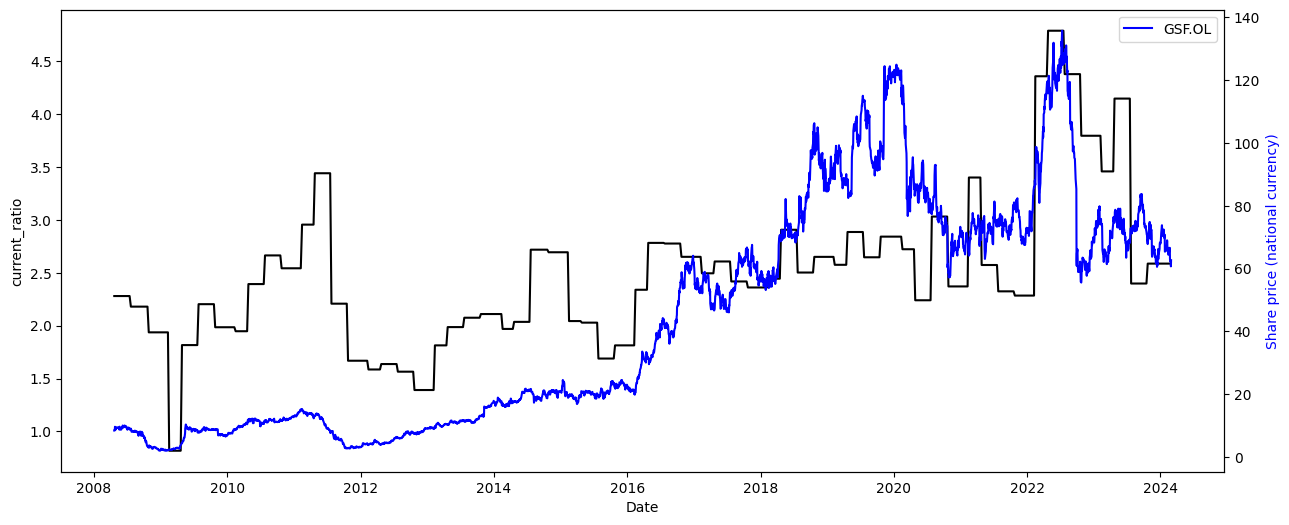

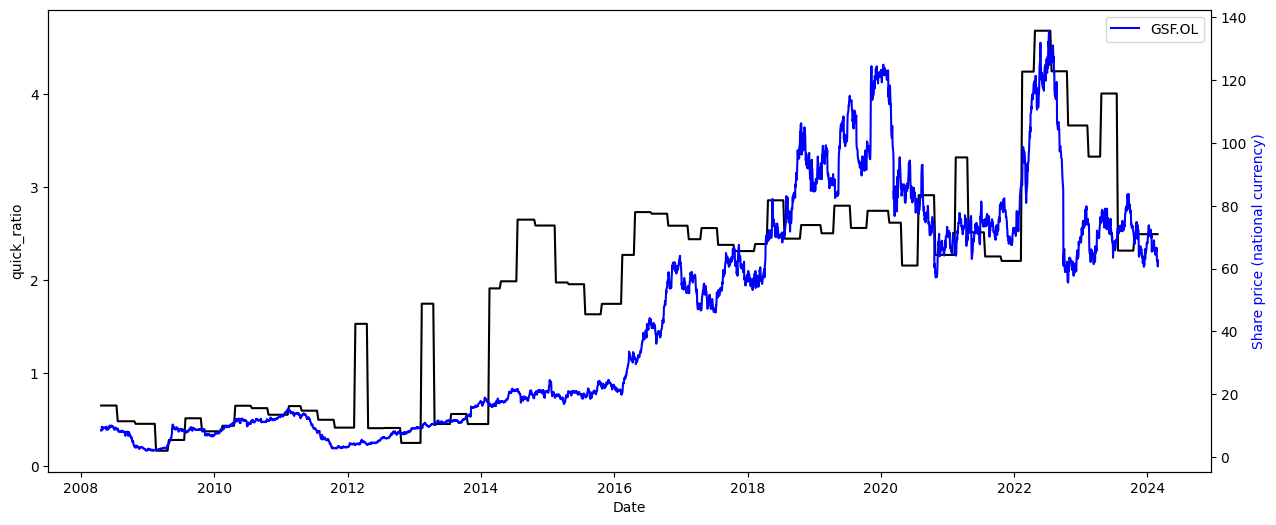

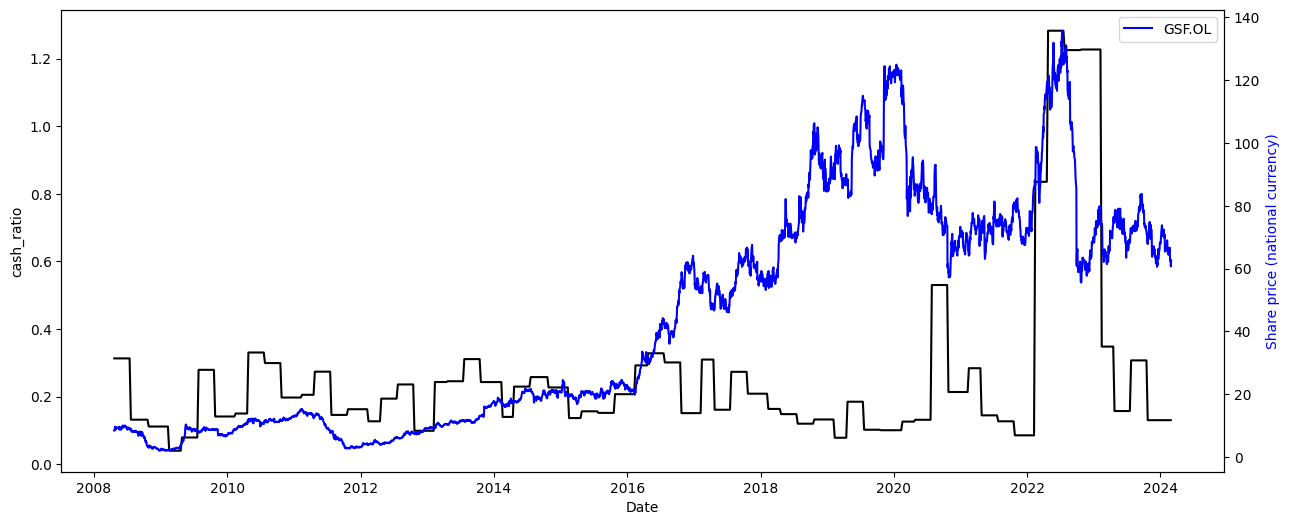

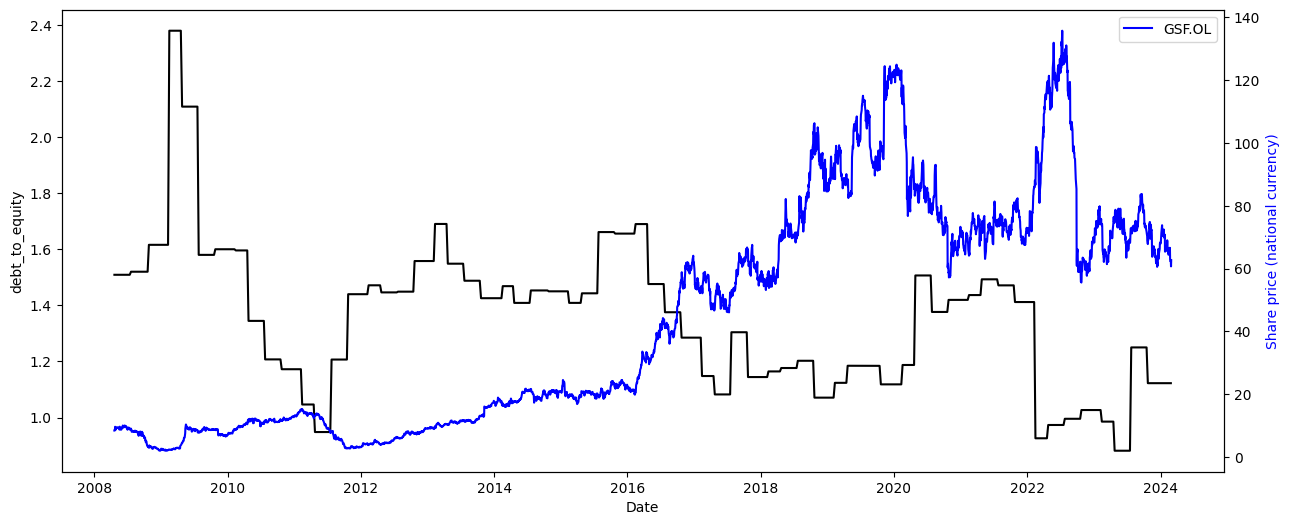

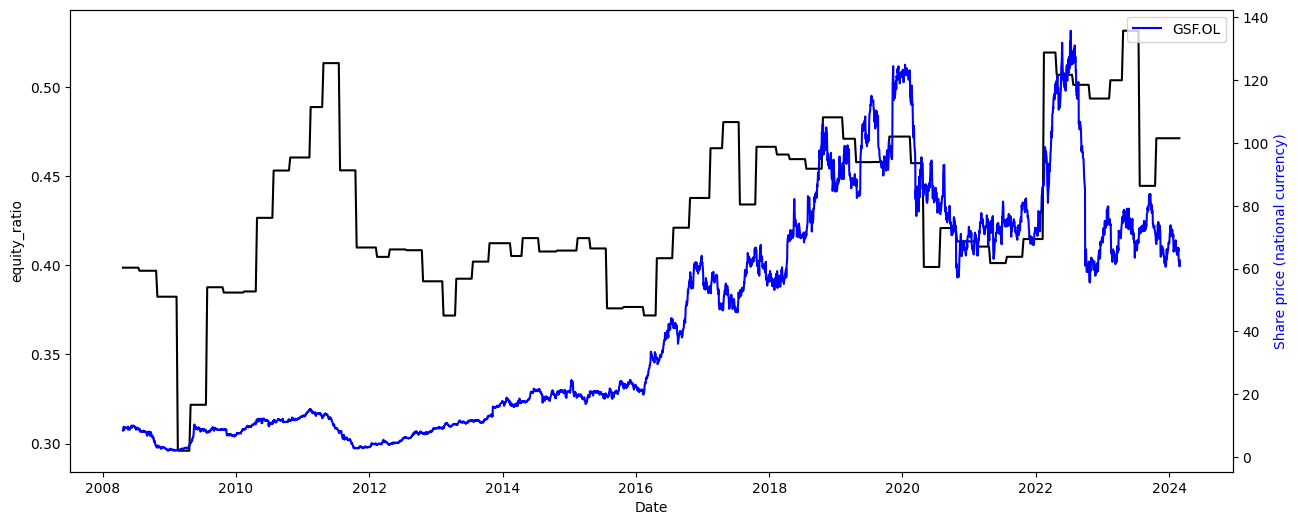

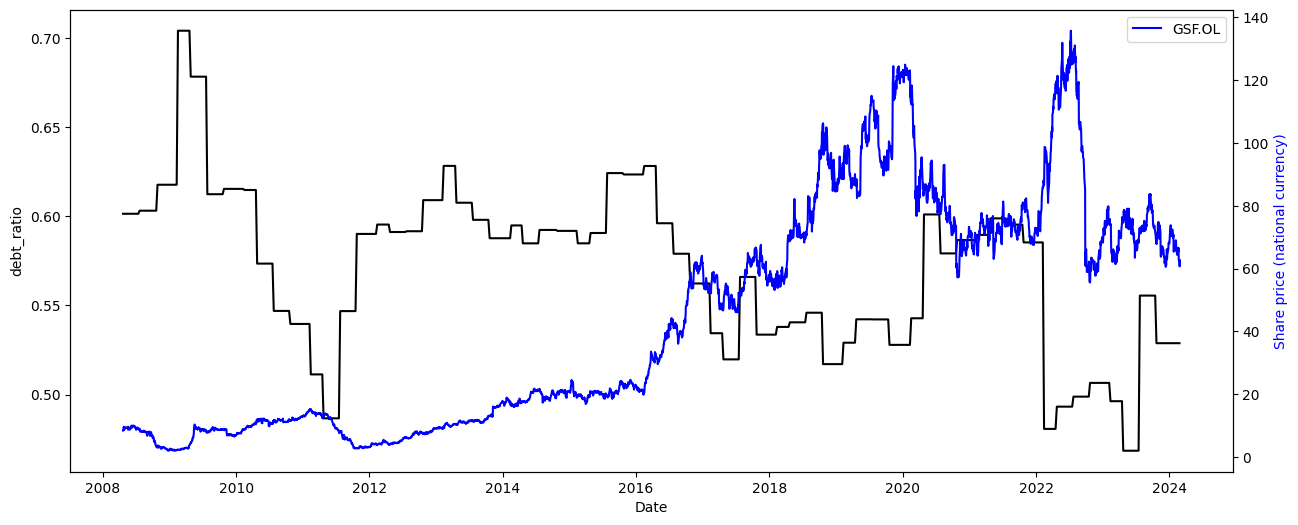

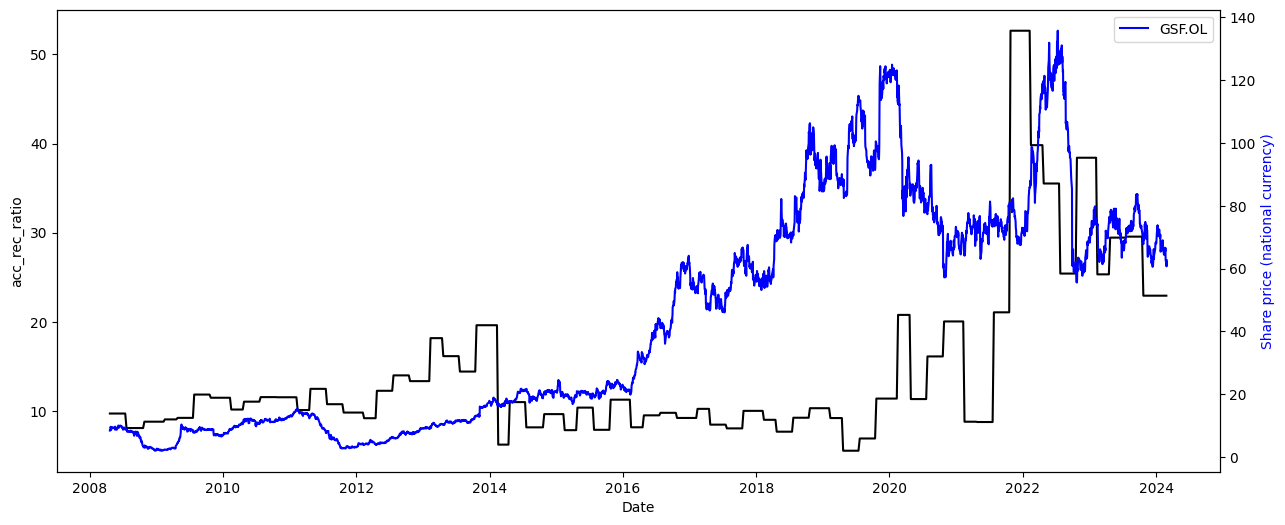

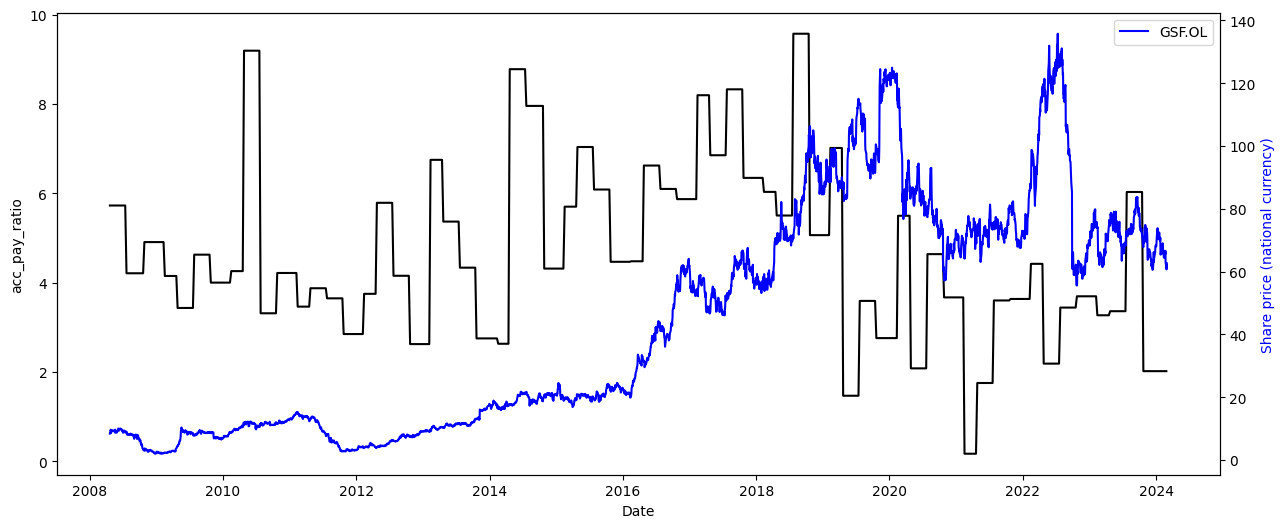

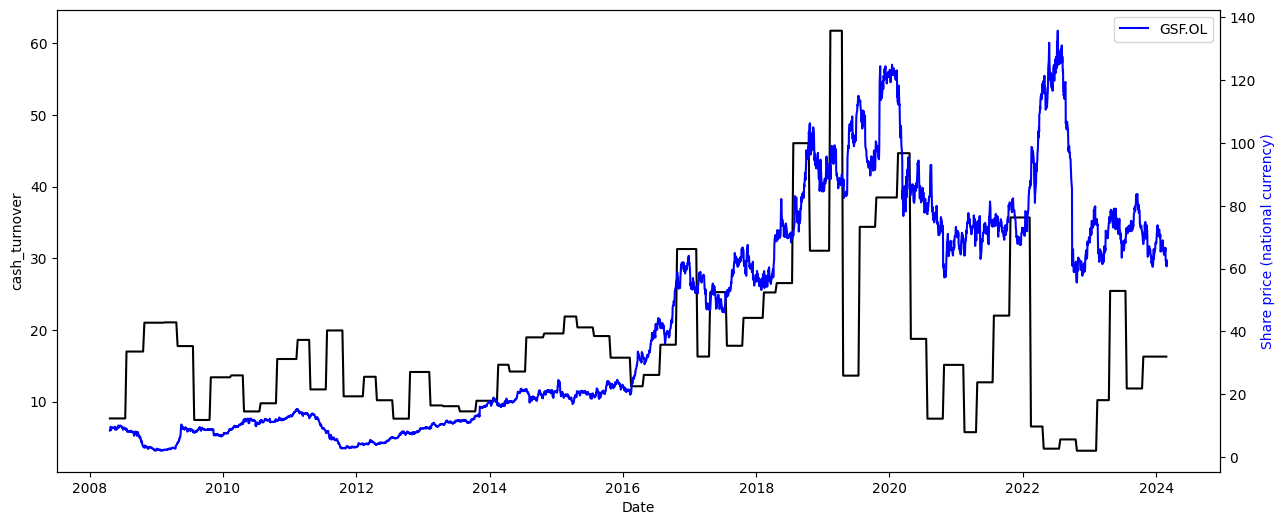

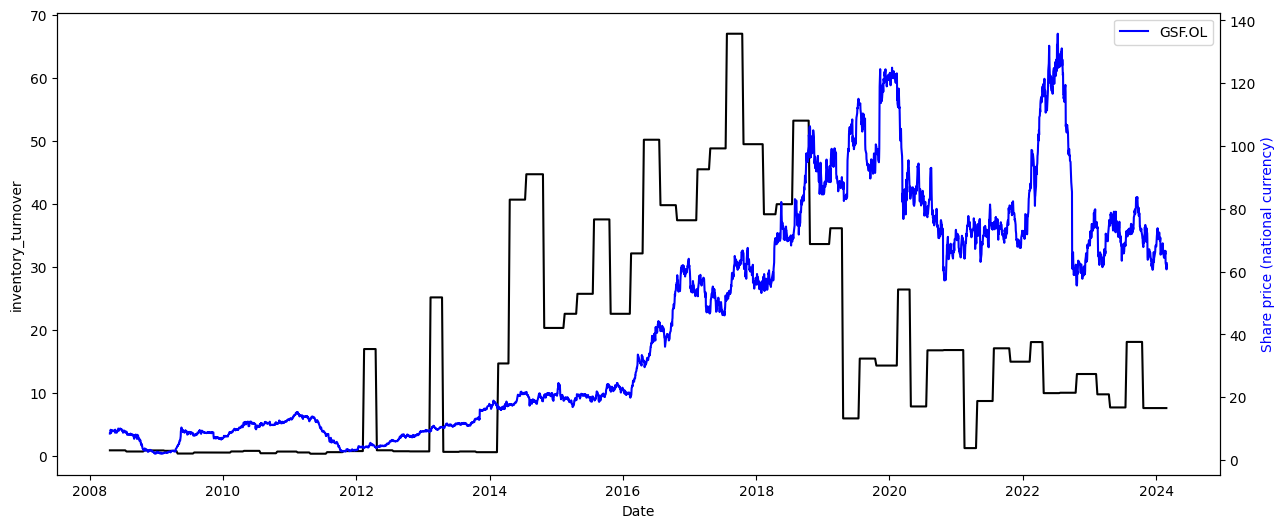

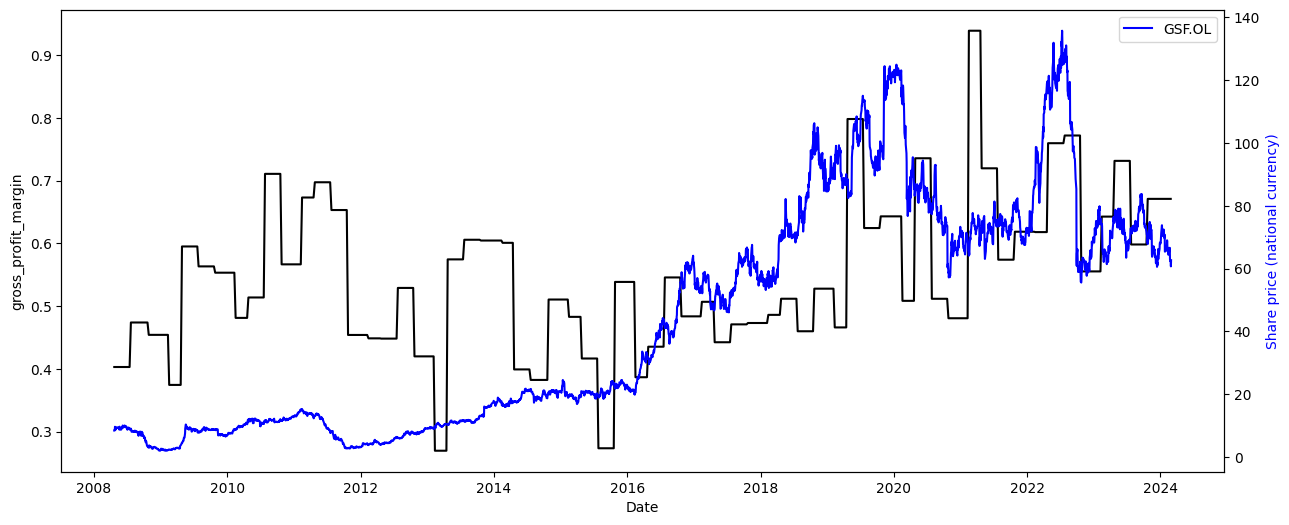

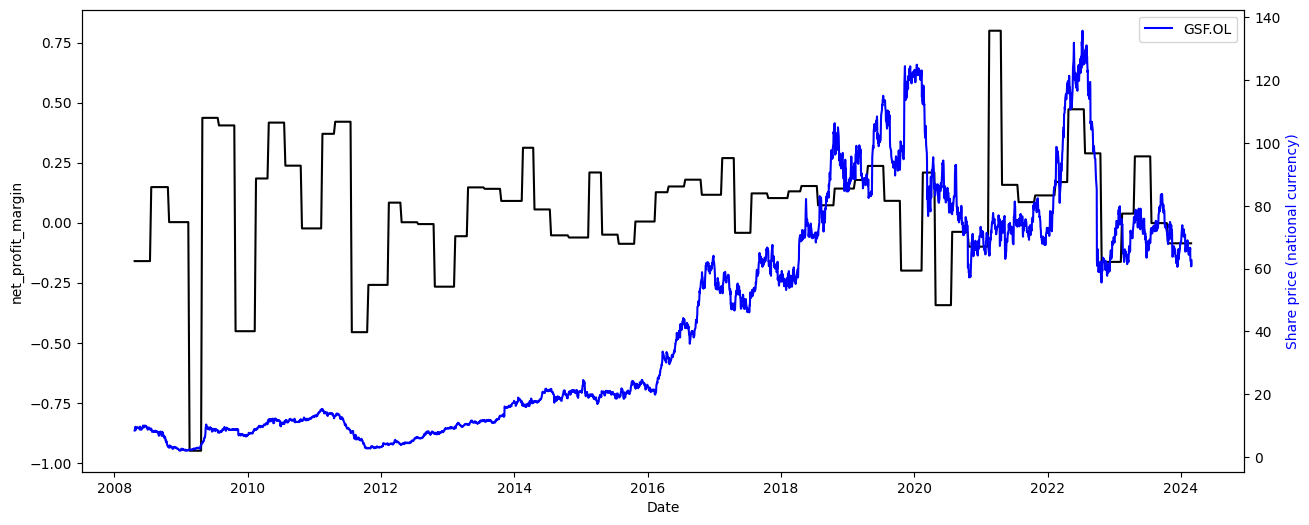

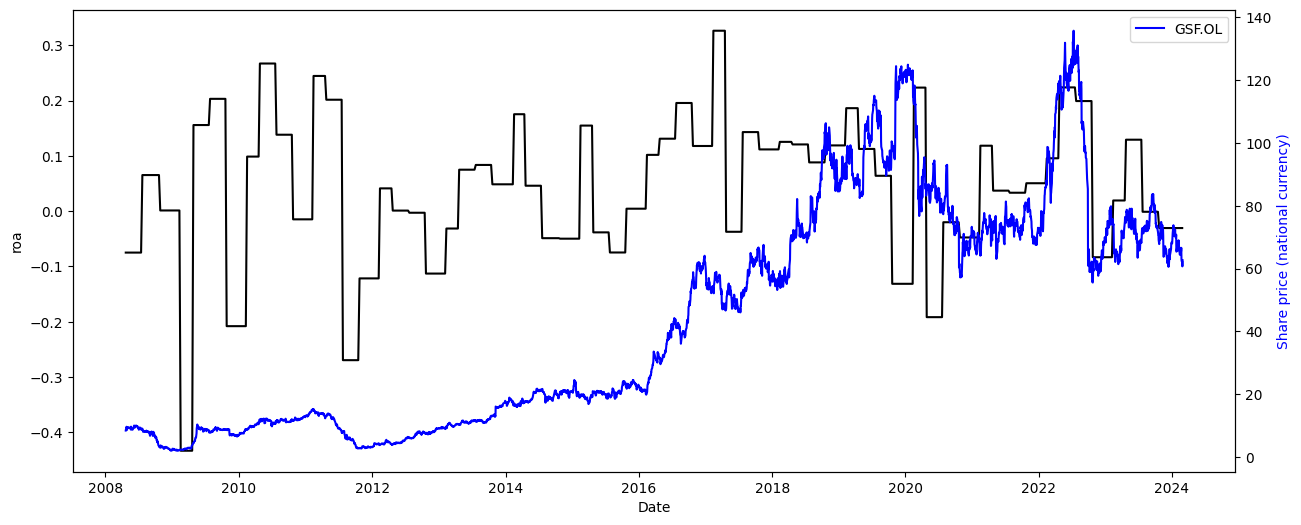

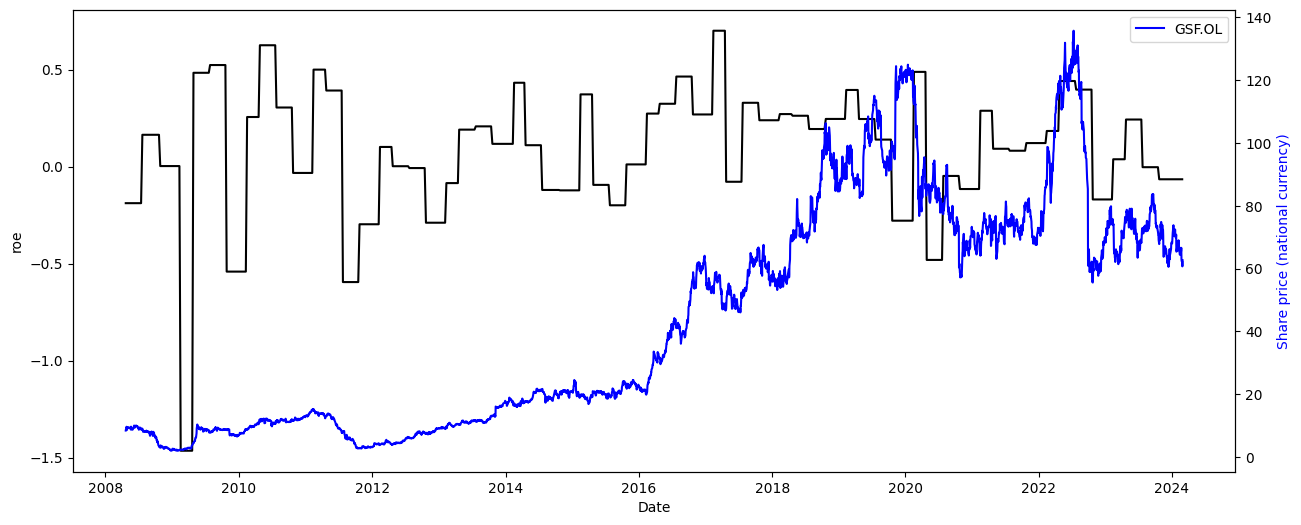

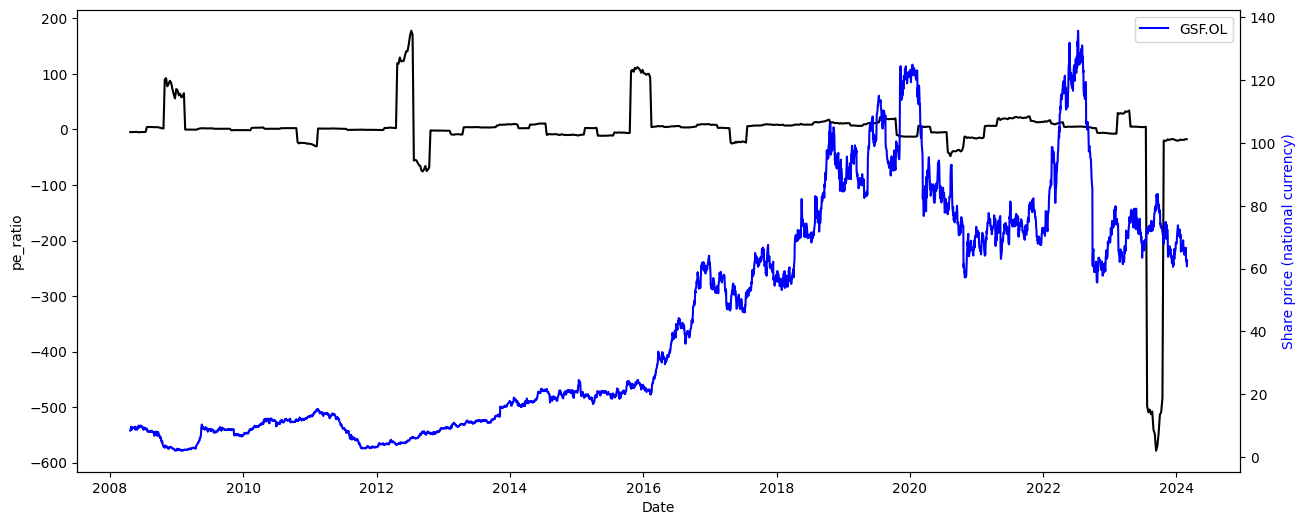

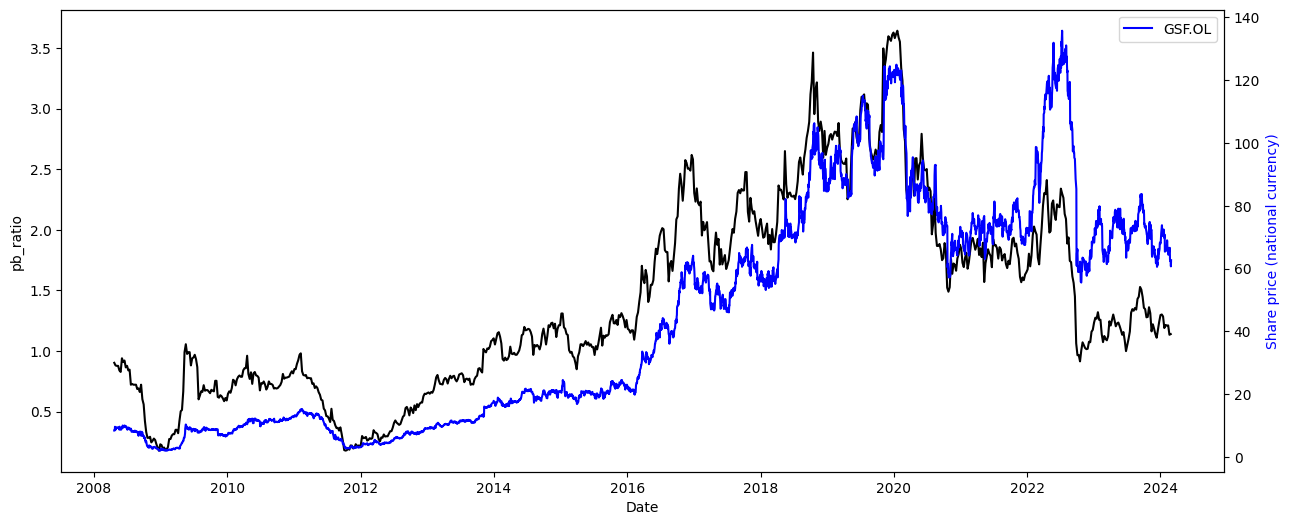

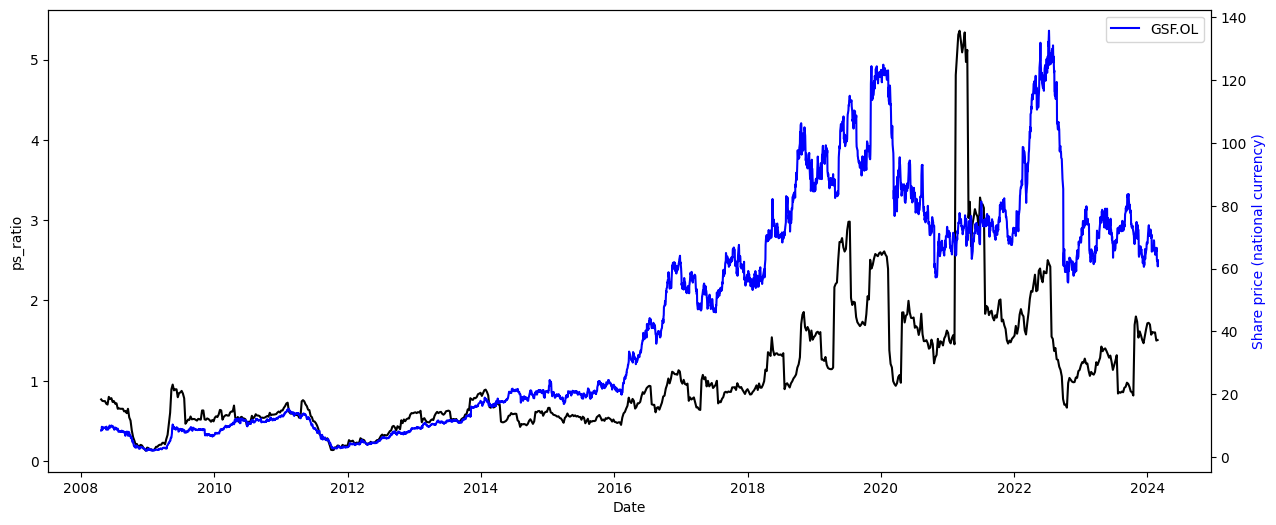

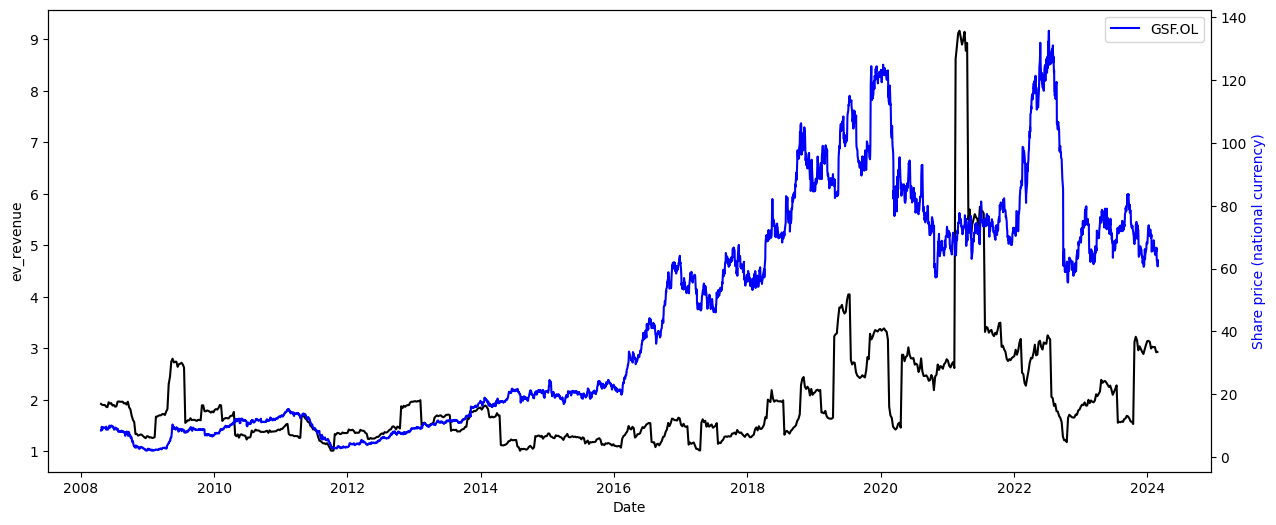

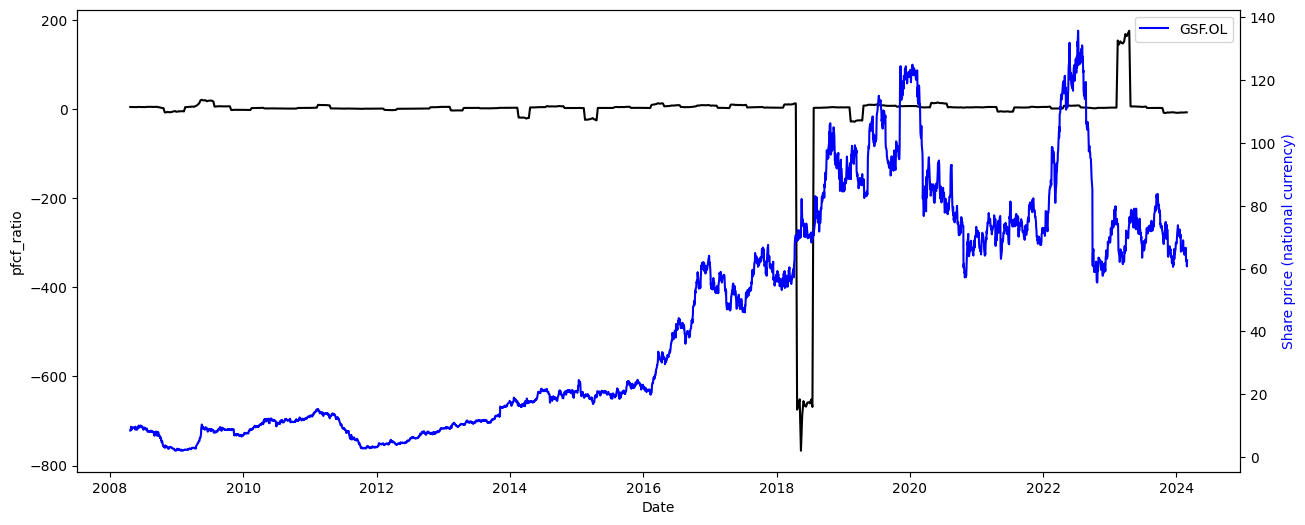

In [17]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

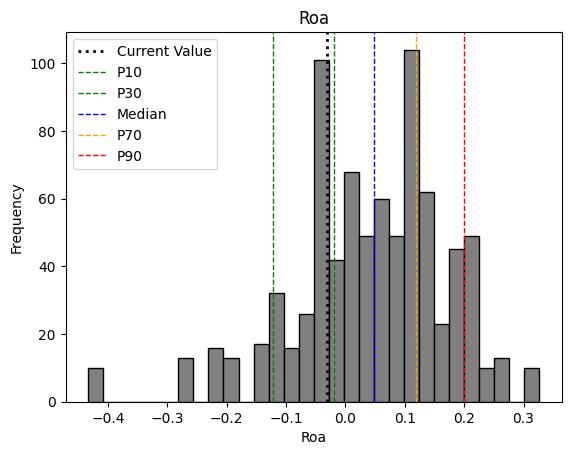

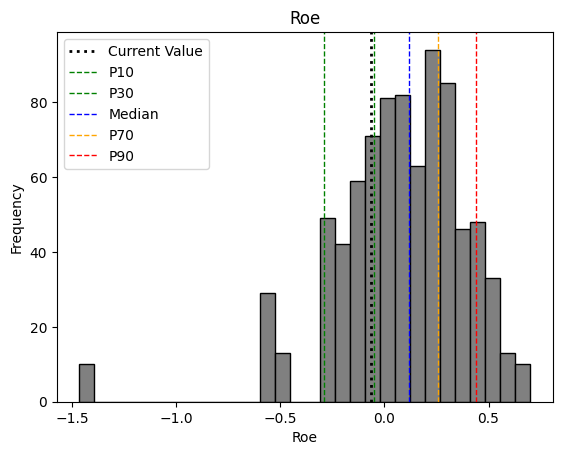

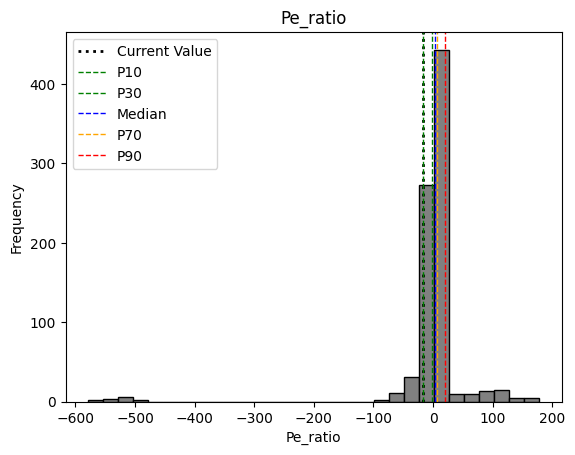

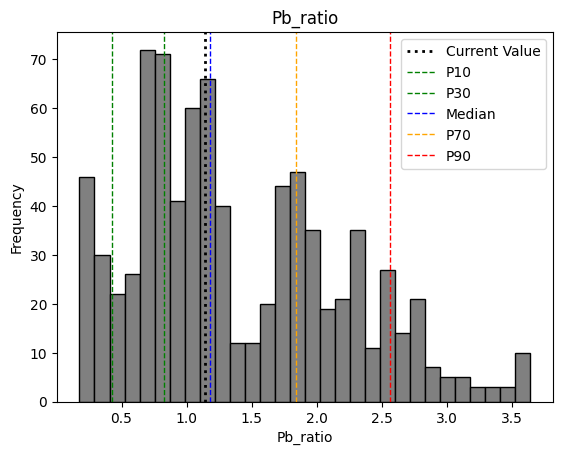

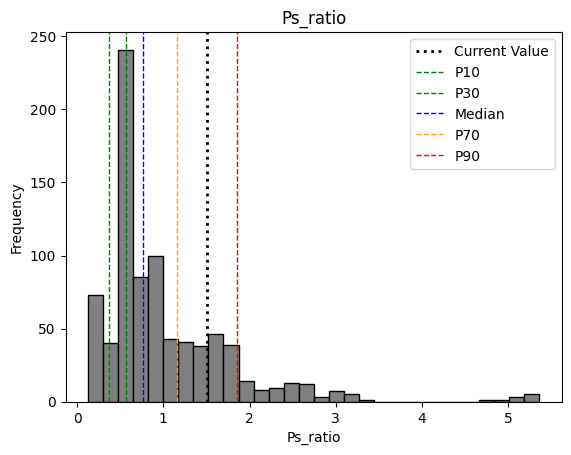

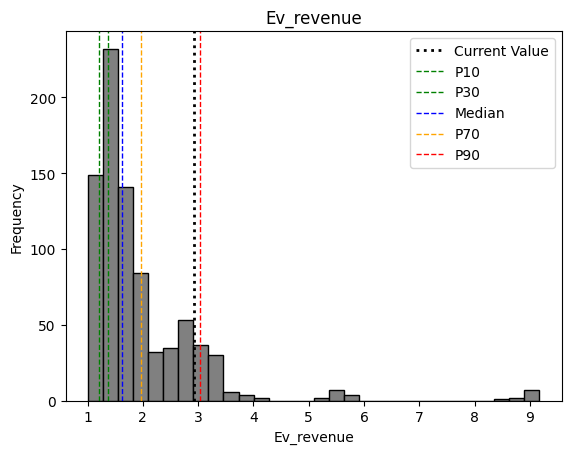

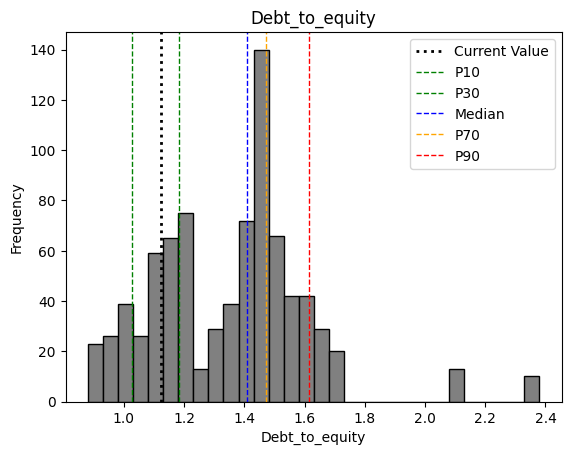

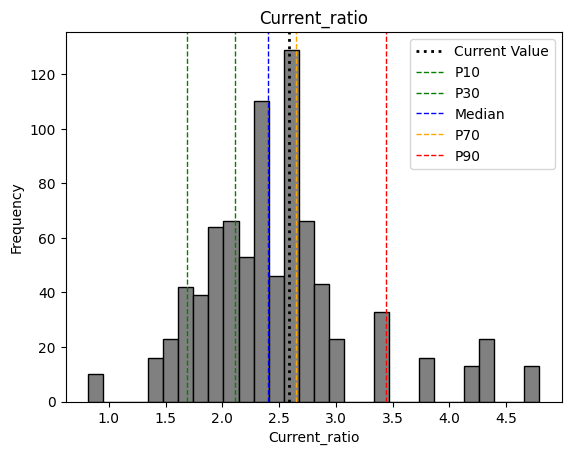

In [18]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[])

## Calculate correlation between value parameters

In [19]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.984835,0.078126,0.237916,0.116685,-0.002984,-0.370317,0.403627
roe,0.984835,1.000000,0.070284,0.230675,0.120293,0.007881,-0.366206,0.379030
pe_ratio,0.078126,0.070284,1.000000,-0.026754,-0.011273,0.015392,0.096150,-0.034223
pb_ratio,0.237916,0.230675,-0.026754,1.000000,0.645453,0.353525,-0.416625,0.411145
ps_ratio,0.116685,0.120293,-0.011273,0.645453,1.000000,0.926079,-0.296531,0.489534
ev_revenue,-0.002984,0.007881,0.015392,0.353525,0.926079,1.000000,-0.041161,0.280662
debt_to_equity,-0.370317,-0.366206,0.096150,-0.416625,-0.296531,-0.041161,1.000000,-0.749283
current_ratio,0.403627,0.379030,-0.034223,0.411145,0.489534,0.280662,-0.749283,1.000000


0 timestemos have been found!


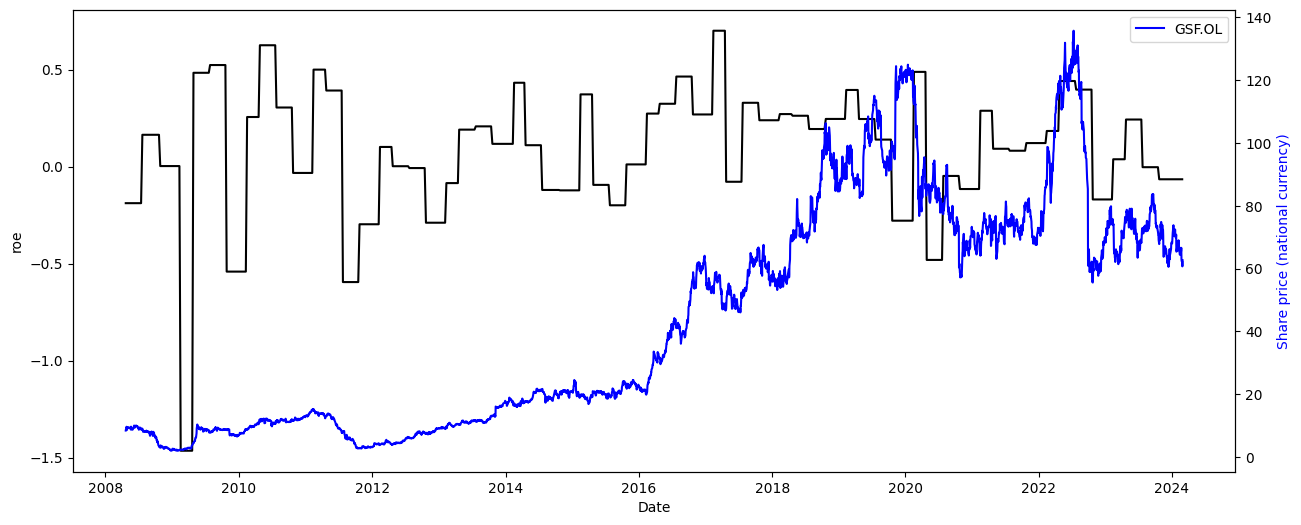

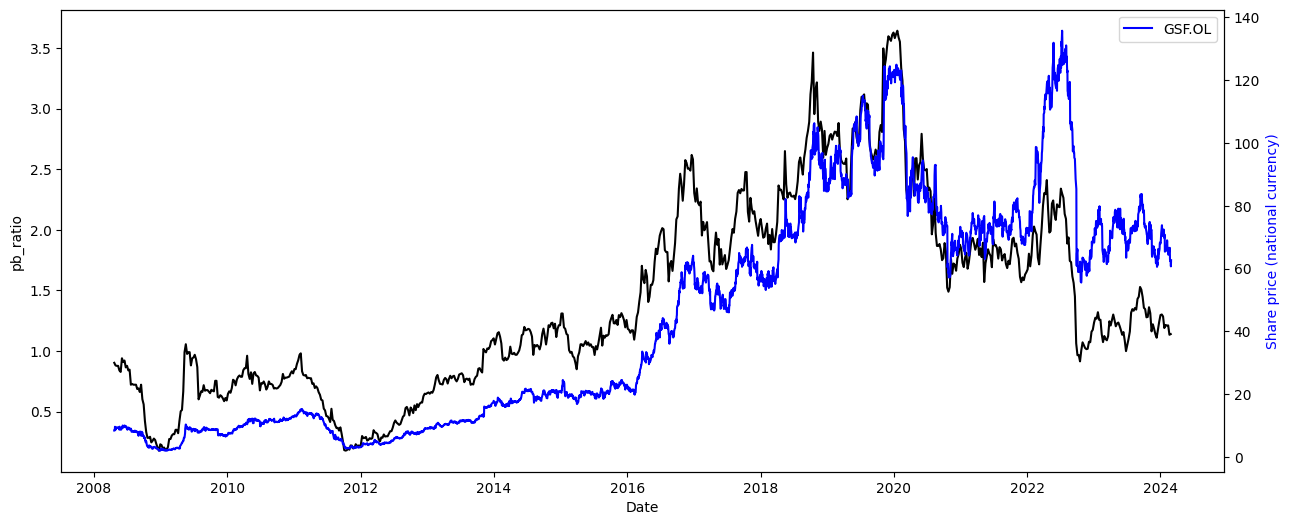

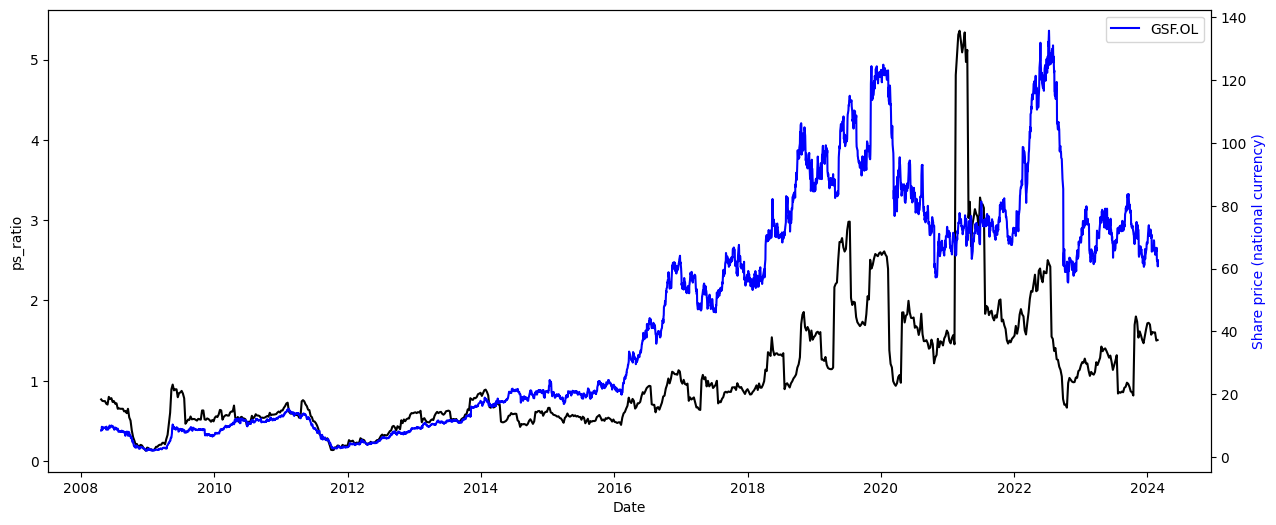

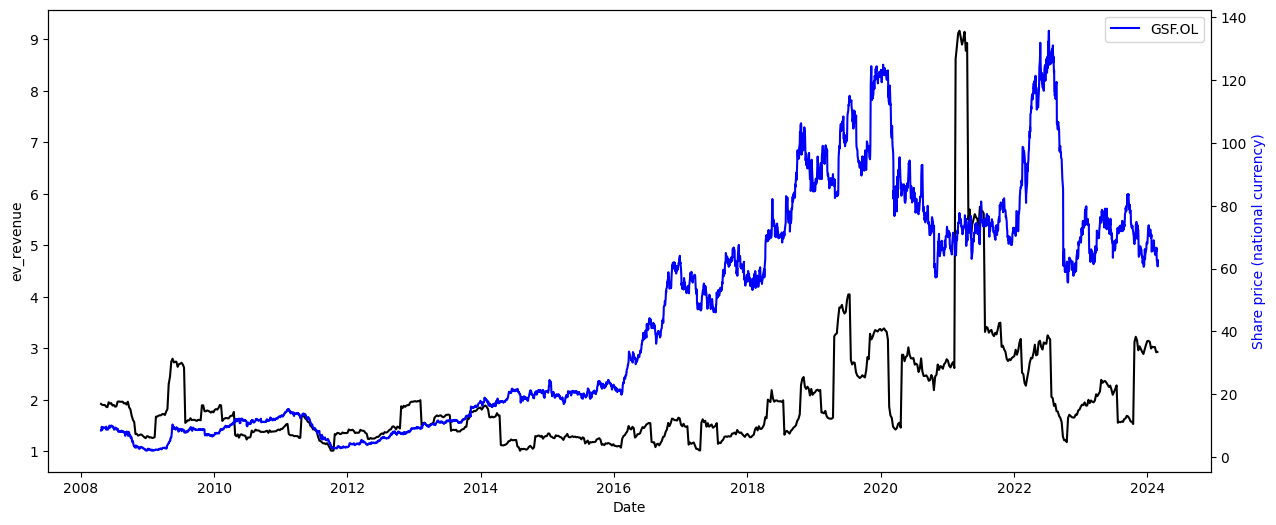

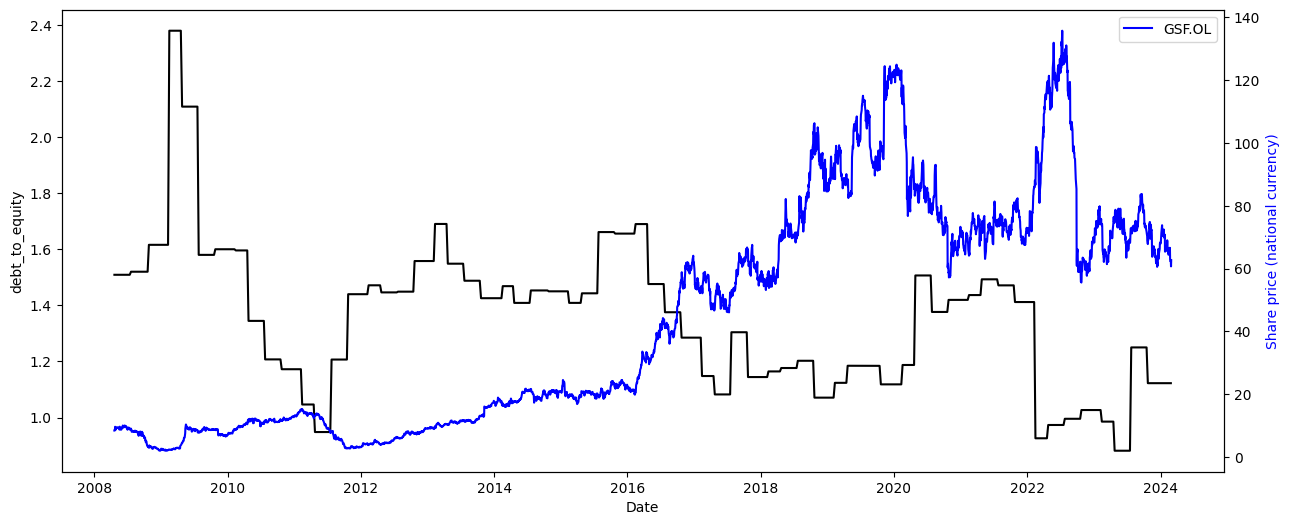

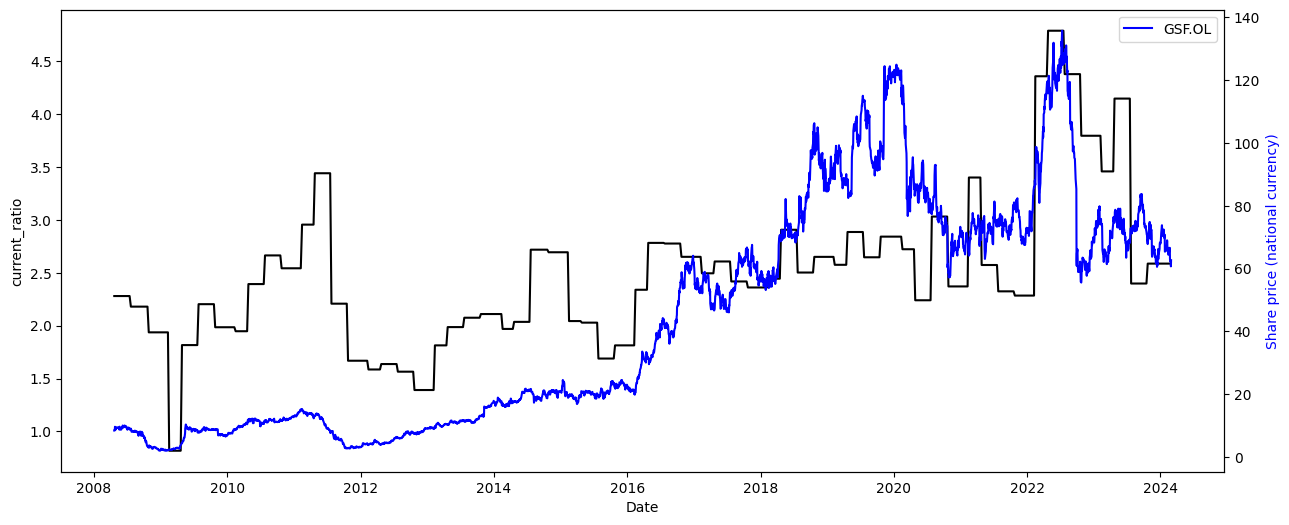

In [20]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2
    )